# Identify swimming
## Judge a book by its cover :)
## Look at gender, age, height, weight, country and year attended to predict the medal

In [163]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#plotly library
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

## Load data and merge 2 files

In [164]:
athlete = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')
merged = pd.merge(athlete,region, on = 'NOC', how='left')

In [165]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [166]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


## Extracting swimming data

In [167]:
swimming = pd.DataFrame(merged[merged['Sport']=='Swimming'])
print("Swimming Data Dimension:",swimming.shape)
print("Type:",type(swimming))
swimming.head()

Swimming Data Dimension: (23195, 17)
Type: <class 'pandas.core.frame.DataFrame'>


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN,Finland,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN,Finland,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN


## Information and missing data

In [168]:
swimming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23195 entries, 29 to 271088
Data columns (total 17 columns):
ID        23195 non-null int64
Name      23195 non-null object
Sex       23195 non-null object
Age       22671 non-null float64
Height    19150 non-null float64
Weight    18804 non-null float64
Team      23195 non-null object
NOC       23195 non-null object
Games     23195 non-null object
Year      23195 non-null int64
Season    23195 non-null object
City      23195 non-null object
Sport     23195 non-null object
Event     23195 non-null object
Medal     3048 non-null object
region    23048 non-null object
notes     515 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 3.2+ MB


## Missing data

In [169]:
swimming.isnull().sum()

ID            0
Name          0
Sex           0
Age         524
Height     4045
Weight     4391
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     20147
region      147
notes     22680
dtype: int64

# Exploratory Analysis (Missing)
## Use swimming data

In [188]:
swimming['BMI'] = swimming['Weight']/(swimming['Height']/100)/(swimming['Height']/100)
medals = swimming[swimming.Medal != 'No Medal']
mcolors = ['xkcd:bronze', 'xkcd:yellow', 'xkcd:silver']

In [171]:
df = pd.DataFrame(athlete['Team'].value_counts())
df['country'] = df.index
df.columns = ['number', 'country']
df = df.reset_index().drop('index', axis=1)
athlete = [ dict(
        type = 'choropleth',
        locations = df['country'],
        locationmode = 'country names',
        z = df['number'],
        text = df['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'Olimpiyata Participants'),
      ) ]
layout = dict(
    title = 'Country of Participants',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)
fig = dict( data=athlete, layout=layout )
iplot( fig, validate=False, filename='world-map')

In [172]:
toplist = medals.region.value_counts().reset_index(name='Medal').head(5)
toplist

,index,Medal
0,USA,1638
1,Germany,1402
2,UK,1291
3,Australia,1268
4,Canada,995


Text(0.5, 1.0, 'Medals per Country')

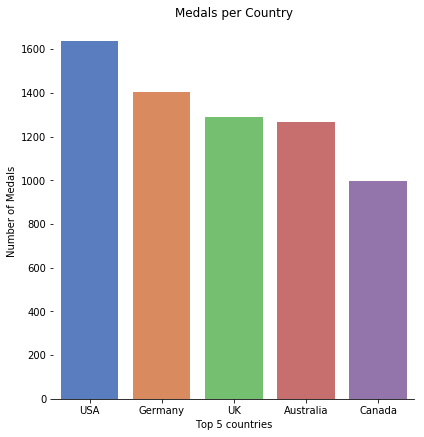

In [173]:
# top5 = medals.loc[medals['region'].isin(toplist['index'])]
# top5.groupby(['region', 'Medal'])['Medal'].count().unstack().plot(kind='bar',color=mcolors,figsize=(15,6))
g = sb.catplot(x="index", y="Medal", data=toplist,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

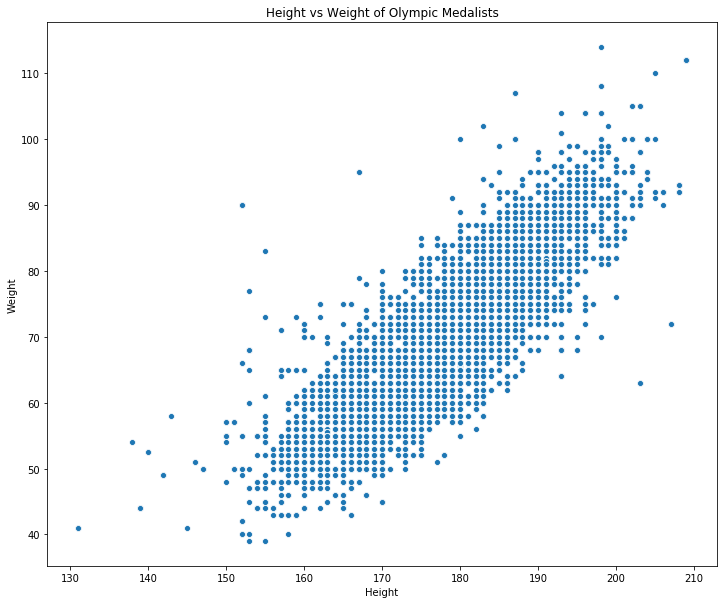

In [174]:
plt.figure(figsize=(12, 10))
ax = sb.scatterplot(x="Height", y="Weight", data=medals)
plt.title('Height vs Weight of Olympic Medalists')

C:\Users\testacc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



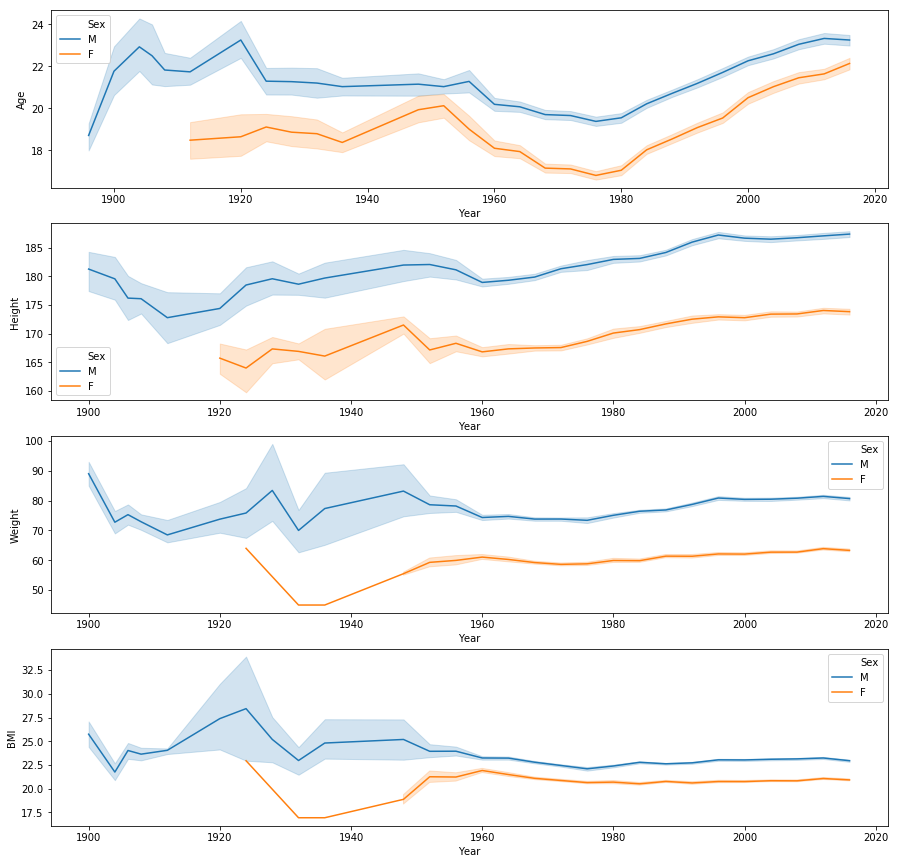

In [175]:
# part = mdata.groupby('Year')['Height'].mean()
# plt.figure(figsize=(20, 10))
# part.plot()
# plt.title('Variation of Male Athletes Height over time')
fig, axes = plt.subplots(4,1,figsize=(15, 15))
sb.lineplot(ax = axes[0], x='Year',y='Age',hue='Sex',data=medals)
sb.lineplot(ax = axes[1], x='Year',y='Height',hue='Sex',data=medals)
sb.lineplot(ax = axes[2], x='Year',y='Weight',hue='Sex',data=medals)
sb.lineplot(ax = axes[3], x='Year',y='BMI',hue='Sex',data=medals)


Text(0.5, 1.0, 'Medal Winners by Age')

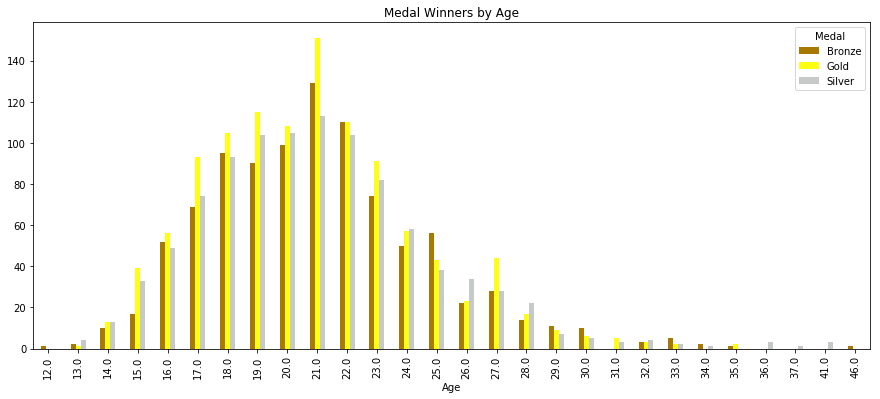

In [189]:
medals.groupby(['Age', 'Medal'])['Medal'].count().unstack().plot(kind='bar',color=mcolors,figsize=(15,6))
plt.title('Medal Winners by Age')

Text(0.5, 1.0, 'Medal Winners by Height')

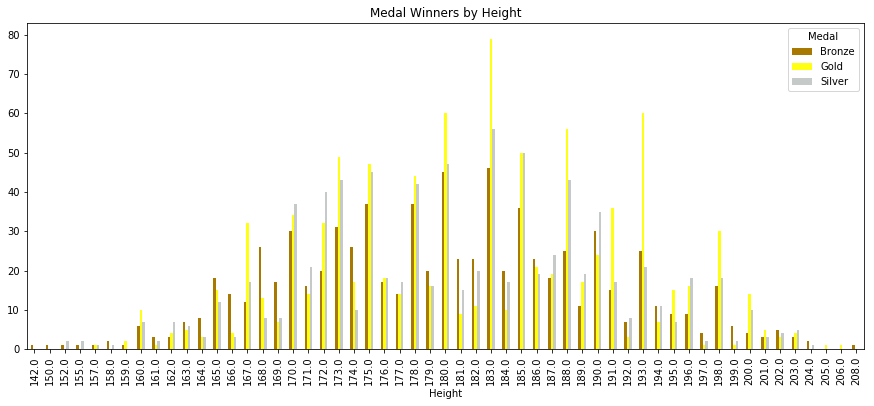

In [177]:
medals.groupby(['Height', 'Medal'])['Medal'].count().unstack().plot(kind='bar',color=mcolors,figsize=(15,6))
plt.title('Medal Winners by Height')

Text(0.5, 1.0, 'Medal Winners by Weight')

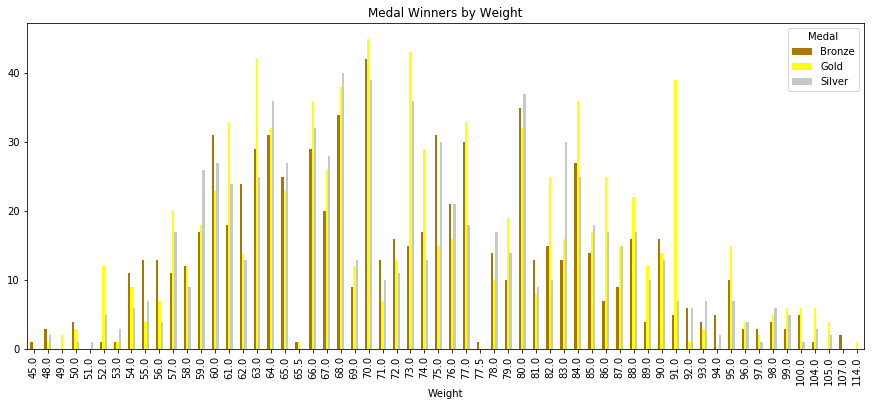

In [178]:
medals.groupby(['Weight', 'Medal'])['Medal'].count().unstack().plot(kind='bar',color=mcolors,figsize=(15,6))
plt.title('Medal Winners by Weight')

Text(0.5, 1.0, 'Medal Winners by BMI')

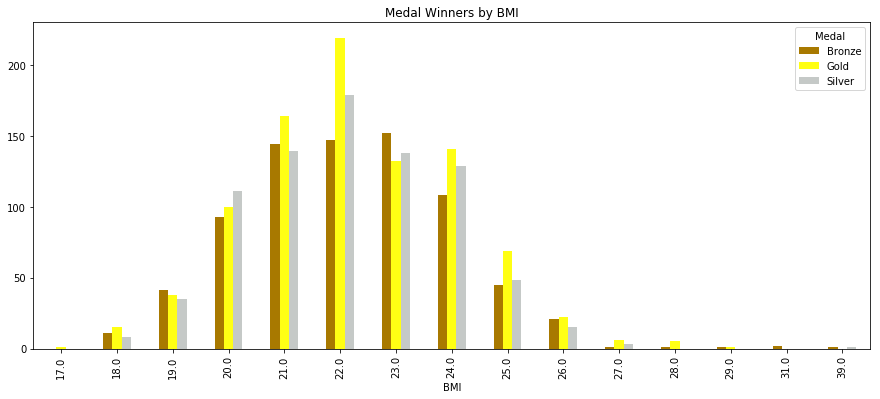

In [190]:
medals = medals.round()
medals.groupby(['BMI', 'Medal'])['Medal'].count().unstack().plot(kind='bar',color=mcolors,figsize=(15,6))
plt.title('Medal Winners by BMI')

In [180]:
df1 = medals
df1['Medal'] = 'Medal Winner'

In [181]:
df_usa=df1
df_usa_medal=df1

medal_map = {'Medal Winner':1}
df_usa_medal['Medal'] = df_usa_medal['Medal'].map(medal_map)

df_usa_sport=df_usa_medal.groupby(['region'],as_index=False)['Medal'].agg('sum')

df_usa_sport=df_usa_sport.sort_values(['Medal'],ascending=False)

df_usa_sport=df_usa_sport.head(10)

colors = ['#91BBF4', '#91F4F4', '#F79981', '#F7E781', '#C0F781','rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)']

n_phase = len(df_usa_sport['region'])
plot_width = 200

# height of a section and difference between sections 
section_h = 100
section_d = 10

# multiplication factor to calculate the width of other sections
unit_width = plot_width / max(df_usa_sport['Medal'])

# width of each funnel section relative to the plot width
phase_w = [int(value * unit_width) for value in df_usa_sport['Medal']]

height = section_h * n_phase + section_d * (n_phase - 1)

# list containing all the plot shapes
shapes = []

# list containing the Y-axis location for each section's name and value text
label_y = []

for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
        else:
                points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (text)
        label_y.append(height - (section_h / 2))

        height = height - (section_h + section_d)
        
label_trace = go.Scatter(
    x=[-200]*n_phase,
    y=label_y,
    mode='text',
    text=df_usa_sport['region'],
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=df_usa_sport['Medal'],
    textfont=dict(
        color='rgb(200,200,200)',
        size=12
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Top 10 Countries</b>",
    titlefont=dict(
        size=12,
        color='rgb(203,203,203)'
    ),
    shapes=shapes,
    height=600,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [182]:
df1 = swimming[swimming.Sex == 'F']
df_usa=df1.ix[(df1['Team']=='United States')]
df_usa_medal=df_usa.ix[df_usa['Medal']=='Gold']

medal_map = {'Gold':1}
df_usa_medal['Medal'] = df_usa_medal['Medal'].map(medal_map)

df_usa_sport=df_usa_medal.groupby(['Name'],as_index=False)['Medal'].agg('sum')

df_usa_sport=df_usa_sport.sort_values(['Medal'],ascending=False)

df_usa_sport=df_usa_sport.head(10)

colors = ['#91BBF4', '#91F4F4', '#F79981', '#F7E781', '#C0F781','rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)']

n_phase = len(df_usa_sport['Name'])
plot_width = 200

# height of a section and difference between sections 
section_h = 100
section_d = 10

# multiplication factor to calculate the width of other sections
unit_width = plot_width / max(df_usa_sport['Medal'])

# width of each funnel section relative to the plot width
phase_w = [int(value * unit_width) for value in df_usa_sport['Medal']]

height = section_h * n_phase + section_d * (n_phase - 1)

# list containing all the plot shapes
shapes = []

# list containing the Y-axis location for each section's name and value text
label_y = []

for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
        else:
                points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (text)
        label_y.append(height - (section_h / 2))

        height = height - (section_h + section_d)
        
label_trace = go.Scatter(
    x=[-200]*n_phase,
    y=label_y,
    mode='text',
    text=df_usa_sport['Name'],
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=df_usa_sport['Medal'],
    textfont=dict(
        color='rgb(200,200,200)',
        size=12
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Top 10 Medal Winners from the USA</b>",
    titlefont=dict(
        size=12,
        color='rgb(203,203,203)'
    ),
    shapes=shapes,
    height=600,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
iplot(fig)

C:\Users\testacc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\Users\testacc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\Users\testacc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [191]:
medals['Height_Range'] = ['140-150' if item>=140 and item<=150 
                          else '151-160' if item>=151 and item<=160
                          else '161-170' if item>=161 and item<=170
                          else '171-180' if item>=171 and item<=180
                          else '181-190' if item>=181 and item<=190
                          else '191-200' if item>=191 and item<=200
                          else '201-210' if item>=201 and item<=210
                          else 'NaN' for item in medals.Height]


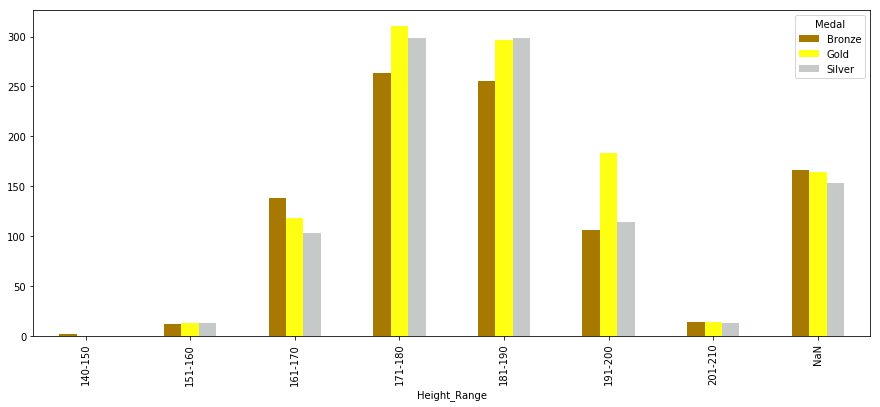

In [193]:
medals.groupby(['Height_Range', 'Medal'])['Medal'].count().unstack().plot(kind='bar',color=mcolors,figsize=(15,6))

In [204]:
medals['Weight_Range'] = ['040kg - 50kg' if item>=40 and item<=50 
                          else '051kg - 60kg' if item>=51 and item<=60
                          else '061-70kg' if item>=61 and item<=70
                          else '071-80' if item>=71 and item<=80
                          else '081-90' if item>=81 and item<=90
                          else '091-100' if item>=91 and item<=100
                          else '101-110' if item>=101 and item<=110
                          else '111-120' if item>=111 and item<=120
                          else 'NaN' for item in medals.Weight]

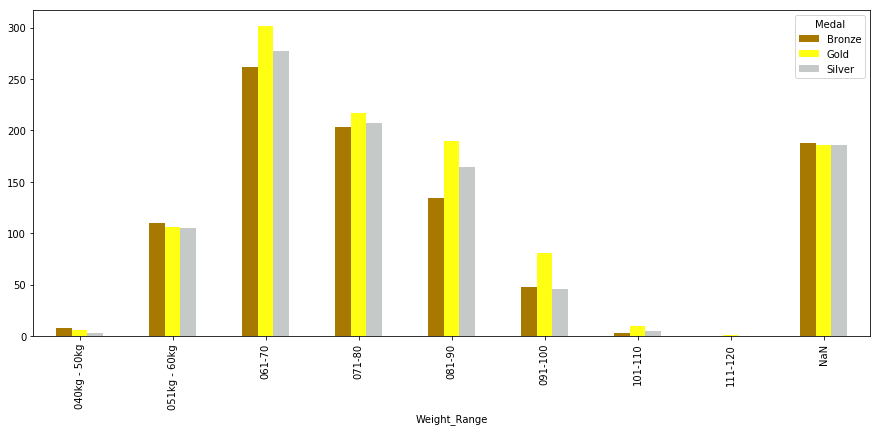

In [205]:
medals.groupby(['Weight_Range', 'Medal'])['Medal'].count().unstack().plot(kind='bar',color=mcolors,figsize=(15,6))

In [201]:
check = medals[medals.Weight >111]
check

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI,Height_Range,Weight_Range
79569,40414,Rolandas Gimbutis,M,19.0,209.0,112.0,Lithuania,LTU,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 50 metres Freestyle,NaN,Lithuania,NaN,26.0,201-210,111-120
79570,40414,Rolandas Gimbutis,M,19.0,209.0,112.0,Lithuania,LTU,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Freestyle,NaN,Lithuania,NaN,26.0,201-210,111-120
79571,40414,Rolandas Gimbutis,M,19.0,209.0,112.0,Lithuania,LTU,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN,Lithuania,NaN,26.0,201-210,111-120
79572,40414,Rolandas Gimbutis,M,23.0,209.0,112.0,Lithuania,LTU,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 50 metres Freestyle,NaN,Lithuania,NaN,26.0,201-210,111-120
79573,40414,Rolandas Gimbutis,M,23.0,209.0,112.0,Lithuania,LTU,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 100 metres Freestyle,NaN,Lithuania,NaN,26.0,201-210,111-120
79574,40414,Rolandas Gimbutis,M,23.0,209.0,112.0,Lithuania,LTU,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN,Lithuania,NaN,26.0,201-210,111-120
79575,40414,Rolandas Gimbutis,M,27.0,209.0,112.0,Lithuania,LTU,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 50 metres Freestyle,NaN,Lithuania,NaN,26.0,201-210,111-120
209214,105041,Paul Curkeet Samson,M,22.0,198.0,114.0,United States,USA,1928 Summer,1928,Summer,Amsterdam,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold,USA,NaN,29.0,191-200,111-120
